<a href="https://colab.research.google.com/github/nguyenbac5299/DataScience/blob/main/SkLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#0. An end to end scikit-Learn workflow

In [ ]:
import pandas as pd

In [ ]:
# 1. import data
heart_disease= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/7.1 heart-disease.csv')
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Create X (feauture matric)
x= heart_disease.drop('target', axis=1)

#Create y(labels)
y= heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
#2. Choose the right model anh hyperarameters
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
# we 'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#4. Evaluate the model
y_preds= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8032786885245902

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        35

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
confusion_matrix(y_test, y_preds)

array([[17,  9],
       [ 3, 32]])

In [ ]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [ ]:
#5. Improve model
# Try different amount of n_estimators
import numpy as np
np.random.seed(0)
for i in range(10,100,10):
  print(f'try model with {i} n_estimators: ')
  model= RandomForestClassifier(n_estimators=i)
  model.fit(X_train, y_train)
  print(f'model accuracy: {model.score(X_test, y_test)}',)

try model with 10 n_estimators: 
model accuracy: 0.819672131147541
try model with 20 n_estimators: 
model accuracy: 0.8032786885245902
try model with 30 n_estimators: 
model accuracy: 0.8524590163934426
try model with 40 n_estimators: 
model accuracy: 0.8032786885245902
try model with 50 n_estimators: 
model accuracy: 0.819672131147541
try model with 60 n_estimators: 
model accuracy: 0.819672131147541
try model with 70 n_estimators: 
model accuracy: 0.819672131147541
try model with 80 n_estimators: 
model accuracy: 0.8032786885245902
try model with 90 n_estimators: 
model accuracy: 0.8360655737704918


In [ ]:
#6. Save a model and load it
import pickle
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [ ]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

#1. getting our data ready to be used with machine learning
3 main things:
1. Split the data into feautures and labels
2. Filling(also called imputing) or disregarding missing values
3. COnverting non- numberical values to numberical values (feauture encoding)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X= heart_disease.drop('target', axis= 1)

In [ ]:
Y= heart_disease['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

##1.1 Make sure it's all numerical

In [ ]:
car_sales= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
X= car_sales.drop('Price', axis=1)
Y= car_sales['Price']
X.shape, Y.shape

((1000, 4), (1000,))

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
# Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cartegorical_features=['Make', 'Colour','Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('One_hot',
                                 one_hot,
                                 cartegorical_features)],
                               remainder='passthrough')

transform_X= transformer.fit_transform(X)
pd.DataFrame(transform_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies= pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test= train_test_split(transform_X,Y, test_size= 0.2)
model= RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

##1.2 What if there were missing values?
1. Fill them with some value(also known as imputation)
2. Remove the samples with missing data altogether

In [ ]:
car_sales_missing= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Let's try convert our data to number ==> NaN value not convert


###Option1: Fill missing data with Pandas

In [ ]:
# Fill the 'Make' Column
car_sales_missing['Make'].fillna('missing', inplace= True)

#Fill the Colour Column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the Odometer Column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace= True)

#Fill the Door Column
car_sales_missing['Doors'].fillna(4, inplace=True)

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [ ]:
# Drop NaN Price
car_sales_missing.dropna(inplace= True)
car_sales_missing.isna().sum()
len(car_sales_missing)

950

In [ ]:
X= car_sales_missing.drop('Price', axis= 1)
Y= car_sales_missing['Price']

In [ ]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [ ]:
cartegorical_features=['Make', 'Colour','Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('One_hot',
                                 one_hot,
                                 cartegorical_features)],
                               remainder='passthrough')

transform_X= transformer.fit_transform(X)
transform_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

###Option2: Filling missing data and transforming categorical data with Scikit-Learn

In [ ]:
car_sales_missing= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
X= car_sales_missing.drop('Price', axis=1)
Y= car_sales_missing['Price']

In [ ]:
#Fill missing value with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill category data with missing and numberic data with mean
cat_imputer= SimpleImputer(strategy='constant',fill_value='missing')
door_imputer= SimpleImputer(strategy='constant', fill_value=4)
num_imputer= SimpleImputer(strategy='mean')

# Define Colums
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

#Create an imputer
imputer= ColumnTransformer([
    ('Cat_imputer',cat_imputer,cat_features),
    ('Door_imputer', door_imputer, door_features),
    ('Num_imputer', num_imputer, num_features)
])
# transform the data
filled_X= imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sale_filled= pd.DataFrame(filled_X,
             columns=['Make', 'Colour','Doors', 'Odometer (KM)'])

In [ ]:
cartegorical_features=['Make', 'Colour','Doors']
one_hot= OneHotEncoder()
transformer= ColumnTransformer([('One_hot',
                                 one_hot,
                                 cartegorical_features)],
                               remainder='passthrough')

transform_X= transformer.fit_transform(car_sale_filled)
transform_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(transform_X,Y,test_size=0.2)
model= RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.10486008486143839

#2. Choosing the right estimator/algorithm for your problem
Scikit_Learn uses estimator as another term for machine learning model or algorithm

* Classifiation- predicting whether a sample is one thing or another

* Regression - predicting a number

##2.1 Picking a machine learning model for regression problem

In [ ]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston= load_boston()
boston

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
boston_df= pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target']= pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# How many sample
len(boston_df)

506

In [ ]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis=1)
Y= boston_df['target']

#Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3)

#Instantiate Ridge model
mode= Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.882899330092286

In [ ]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Set up seed
np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis=1)
Y= boston_df['target']

#Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3)

#Instantiate Ridge model
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

# Check the score of the Ridge model on test data
rf.score(X_test, y_test)

0.882899330092286

##2.2 Picking a machine learning model for classification problem

In [ ]:
heart_disease= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/11.2 heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

In [ ]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Create data
X= heart_disease.drop('target', axis=1)
Y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

# Instantiate LinearSVC
clf= LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [ ]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#Import the RandomForesCalssify estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Create data
X= heart_disease.drop('target', axis=1)
Y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

# Instantiate LinearSVC
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

#3. Fitting the model to the data

##3.1 Fitting the model to data

In [ ]:
#Import the RandomForesCalssify estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Create data
X= heart_disease.drop('target', axis=1)
Y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

# Instantiate LinearSVC
clf= RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

##3.2 Make predictions using a machine learning model
2 way to make predictions:
1. `predict()`
2. `predict_proba()`


In [ ]:
#Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Compare predicitons to truth labels to evaluate the model
y_preds= clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [ ]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_preds, y_test)

0.8524590163934426

In [ ]:
# Make prediction with predict_proba()
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
#Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

` predict()` can also be used for regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= boston_df.drop('target', axis=1)
Y= boston_df['target']

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

model= RandomForestRegressor()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

In [ ]:
y_pred[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [ ]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [ ]:
#COmpare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.136382352941176

#4. Evaluating a machine learning model
3 way to evaluate sklearn model:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-spectific metric functions

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis=1)
Y= heart_disease['target']

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2)

model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

##4.1 Evaluating a model with the score method

In [ ]:
model.score(X_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= boston_df.drop('target', axis=1)
Y= boston_df['target']

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

model= RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

##4.2 Evaluating a model using `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis=1)
Y= heart_disease['target']

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2)

model= RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score(model, X, Y, cv=4)

array([0.85526316, 0.88157895, 0.76315789, 0.77333333])

In [ ]:
np.random.seed(42)

# Single training and test split score
model_single_score= model.score(X_test, y_test)

# Take the mean of 5-fold cross_validation score
model_val_score= np.mean(cross_val_score(model, X, Y, cv=5))

#Compare the two

model_single_score, model_val_score

(0.8524590163934426, 0.8248087431693989)

###4.2.1 Classification model evaluation metrics


####Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X= heart_disease.drop('target', axis=1)
y= heart_disease['target']

clf= RandomForestClassifier()
cross_val_score= cross_val_score(clf, X, y, cv=5)

In [ ]:
np.mean(cross_val_score)

0.8018032786885245

####Area under the receiver operating characteristic curve(AUC/ROC)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)
y_probs= clf.predict_proba(X_test)

In [ ]:
y_probs[:10]

array([[0.11, 0.89],
       [0.53, 0.47],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.87, 0.13]])

In [ ]:
y_probs_positive= y_probs[:,1]
y_probs_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [ ]:
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive)

In [ ]:
fpr[:10]

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625])

In [ ]:
thresholds[:10]

array([2.  , 1.  , 0.99, 0.92, 0.89, 0.84, 0.81, 0.79, 0.77, 0.63])

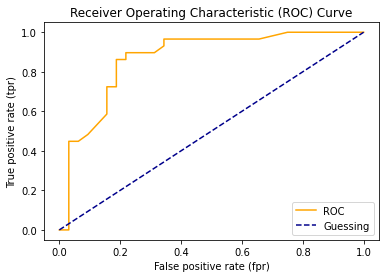

In [ ]:
import matplotlib.pyplot as plt
#Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
  # Plot ROC curve
  plt.plot(fpr, tpr, color='orange', label='ROC')
  #Plot line with no predicive power(base line)
  plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')

  #Customize the plot
  plt.xlabel('False positive rate (fpr)')
  plt.ylabel('True positive rate (tpr)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8679956896551724

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds= clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  8],
       [ 3, 26]])

In [ ]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


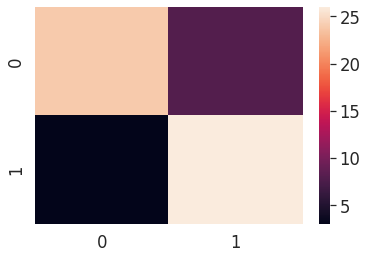

In [ ]:
# Make cofusion metric with the Seaborn heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale= 1.5)

#Create a confusion metric
conf_mat= confusion_matrix(y_test, y_preds)

# Plot it using Seaborb
sns.heatmap(conf_mat);

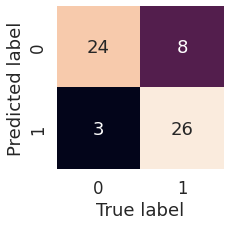

In [ ]:
def plot_conf_mat(conf_mat):
  fig, ax= plt.subplots(figsize=(3,3))
  ax= sns.heatmap(conf_mat,
                  annot= True,
                  cbar= False)
  plt.xlabel('True label')
  plt.ylabel('Predicted label');

plot_conf_mat(conf_mat)

####Creating a confusion matric using Scikit-Learn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


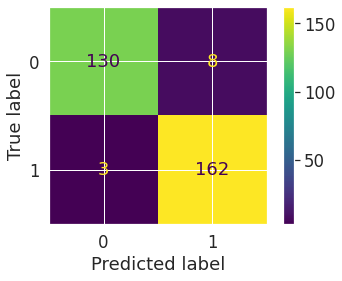

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X,y);

####Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



###4.2.2 Regression model evaluation metrics

####R^2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X= boston_df.drop('target', axis=1)
y= boston_df['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestRegressor()
clf.fit(X_train, y_train)
 
clf.score(X_test, y_test)

0.8833462645404007


####mean absolute error(MAE)

In [ ]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds= clf.predict(X_test)
mae= mean_absolute_error(y_test, y_preds)


####mean squared error(MSE)

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_test, y_preds)
mse

9.922115999999988

###4.2.3 Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestClassifier()

In [ ]:
np.random.seed(42)

cv_acc= cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Cross-validated accuracy
print(f'cross-validated accurcy: {np.mean(cv_acc)*100:.2f}%')

cross-validated accurcy: 82.48%


In [ ]:
np.random.seed(42)
cv_acc= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'cross-validated accurcy: {np.mean(cv_acc)*100:.2f}%')

cross-validated accurcy: 82.48%


In [ ]:
np.random.seed(42)
cv_precision= cross_val_score(clf, X, y, cv=5, scoring='precision')
print(f'cross-validated accurcy: {np.mean(cv_precision)*100:.2f}%')

cross-validated accurcy: 83.30%


In [ ]:
np.random.seed(42)
cv_recall= cross_val_score(clf, X, y, cv=5, scoring='recall')
print(f'cross-validated accurcy: {np.mean(cv_recall)*100:.2f}%')

cross-validated accurcy: 85.45%


In [ ]:
np.random.seed(42)
cv_f1= cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f'cross-validated accurcy: {np.mean(cv_f1)*100:.2f}%')

cross-validated accurcy: 84.27%


In [ ]:
# How about regression model?
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= boston_df.drop('target', axis= 1)
y= boston_df['target']

clf= RandomForestRegressor()
cv_default= cross_val_score(clf,X, y, cv=5)
cv_default

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [ ]:
# R2
np.random.seed(42)
cv_r2= cross_val_score(clf, X, y, cv=5, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [ ]:
# Mean absolute error
cv_mae= cross_val_score(clf, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [ ]:
# mean squared error
cv_mse= cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

##4.3 Using different evaluation metrics as Scikit-Learn function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= heart_disease.drop('target', axis=1)
y= heart_disease['target']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2)

clf= RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some prediction
y_preds= clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(42)

X= boston_df.drop('target', axis=1)
y= boston_df['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
clf= RandomForestRegressor()
clf.fit(X_train, y_train)

y_preds= clf.predict(X_test)

print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MSE: {mean_absolute_error(y_test, y_preds)}')
print(f'MAE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.8654448653350507
MSE: 2.136382352941176
MAE: 9.867437068627442


#5.Improving a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##5.1 Tuning hyperparameters by hand

In [ ]:
#Let's make 3 set: training, validation and test 
def evaluate_preds(y_true, y_preds):
  accurancy= accuracy_score(y_true, y_preds)
  precision= precision_score(y_true, y_preds)
  recall= recall_score(y_true, y_preds)
  f1= f1_score(y_true, y_preds)

  metrics_dict={'accuraccy': round(accurancy,2),
                'precision': round(precision,2),
                'recall': round(recall, 2),
                'f1': round(f1,2)}
  print(f'acc: {accurancy * 100:.2f}%')
  print(f'precision: {precision:.2f}')
  print(f'recall: {recall:2f}.')
  print(f'f1:{f1:.2f}')

  return metrics_dict


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

 ## Shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

# Split into X, y
X= heart_disease_shuffled.drop('target', axis=1)
y= heart_disease_shuffled['target']
# Split the data into train, val, test
train_split= round(len(heart_disease_shuffled)*0.7)
val_split= round(len(heart_disease_shuffled)*0.15)+ train_split

X_train, y_train= X[:train_split], y[:train_split]
X_val, y_val= X[train_split:val_split], y[train_split:val_split]
X_test, y_test= X[val_split:], y[val_split:]

len(X_train), len(X_val), len(X_test)

(212, 45, 46)

In [ ]:
clf= RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
clf.fit(X_train, y_train)
# Make baseline predictions
y_preds= clf.predict(X_val)

#Evaluate
baseline_metrics= evaluate_preds(y_val, y_preds)

acc: 82.22%
precision: 0.81
recall: 0.880000.
f1:0.85


In [ ]:
np.random.seed(42)
# Create a second classifier with different hyperparameter

clf2= RandomForestClassifier(max_depth=100)
clf2.fit(X_train, y_train)

y_preds= clf2.predict(X_val)

metrics2= evaluate_preds(y_val, y_preds)

acc: 82.22%
precision: 0.84
recall: 0.840000.
f1:0.84


##5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators': [10, 100, 200],
      'max_depth': [None, 50, 100, 150],
      'max_features':['auto','sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}
np.random.seed(42)

X,y= heart_disease_shuffled.drop('target',axis=1), heart_disease_shuffled['target']

X_train, X_test, y_train,y_test= train_test_split(X, y ,test_size= 0.2)

clf= RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf= RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,#number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; t

In [ ]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50}

In [ ]:
# make prediction with the best parameter

rs_y_preds= rs_clf.predict(X_test)

# Evaluate
rs_metrics= evaluate_preds(y_test, rs_y_preds)

acc: 81.97%
precision: 0.77
recall: 0.857143.
f1:0.81


##5.3 Hyperparameter tuning with GridSearchCV

In [ ]:
grid2={'n_estimators': [100, 200],
      'max_depth': [None, 100],
      'max_features':['auto'],
      'min_samples_split':[6],
      'min_samples_leaf':[1,2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X,y= heart_disease_shuffled.drop('target',axis=1), heart_disease_shuffled['target']

X_train, X_test, y_train,y_test= train_test_split(X, y ,test_size= 0.2)

clf= RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid2,
                    cv=5,
                    verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n

In [ ]:
gs_clf.best_params_

{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds= gs_clf.predict(X_test)

gs_metrics= evaluate_preds(y_test, gs_y_preds)

acc: 81.97%
precision: 0.77
recall: 0.857143.
f1:0.81


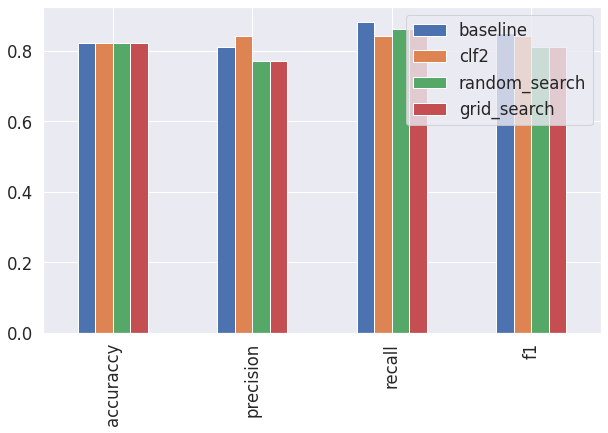

In [ ]:
compare_metrics= pd.DataFrame({'baseline': baseline_metrics,
                               'clf2': metrics2,
                               'random_search': rs_metrics,
                               'grid_search': gs_metrics})

compare_metrics.plot.bar(figsize=(10,6))

#6. Saving and loading trained machine learning models

##Pickle

In [ ]:
import pickle
# Save model
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [ ]:
# Load pickle model
loaded_pickle_model= pickle.load(open('/content/gs_random_forest_model_1.pkl','rb'))

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2


In [ ]:
# make some prediction
y_pred= loaded_pickle_model.predict(X_test[:1])
y_pred

array([0])

##Joblib

In [ ]:
from joblib import dump, load

# Save
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [ ]:
#Load model
loaded_joblib_model= load(filename='/content/gs_random_forest_model_1.joblib')

y_pred= loaded_joblib_model.predict(X_test[:1])

In [ ]:
y_pred

array([0])

#7. Putting it all together!

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [ ]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Step we want to do(all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [ ]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features= ['Make','Colour']
categorical_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_features= ['Doors']
door_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numberic_features= ['Odometer (KM)']
numberic_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing data then convert to numbers)
preprocessor= ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_features),
        ('num', numberic_transformer, numberic_features)
    ]
)
# Creating a preprocessing and modelling pipeline
model= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
    ])
# Split data
X, y= data.drop('Price', axis=1), data['Price']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

# Fit and score the model

model.fit(X_train, y_train)
model.score(X_test,y_test)


0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [ ]:

# Use GridSearchCV with our regression pipeline
pipe_grid={
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,100],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}

gs_model= GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [ ]:
gs_model.score(X_test, y_test)

0.25448780160813556